In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv("./train.csv")

In [4]:
df_train.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df_train.shape

(404290, 6)

In [6]:
df_train['is_duplicate'].sum()

149263

In [7]:
149263/404290

0.369197853026293

In [13]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)

In [9]:
len(np.unique(qids))

537933

In [10]:
np.sum(qids.value_counts() > 1)

111780

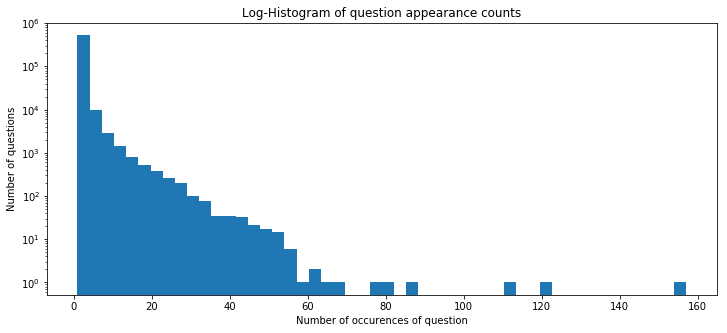

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

mean-train 11.06 std-train 5.89 max-train 237.00


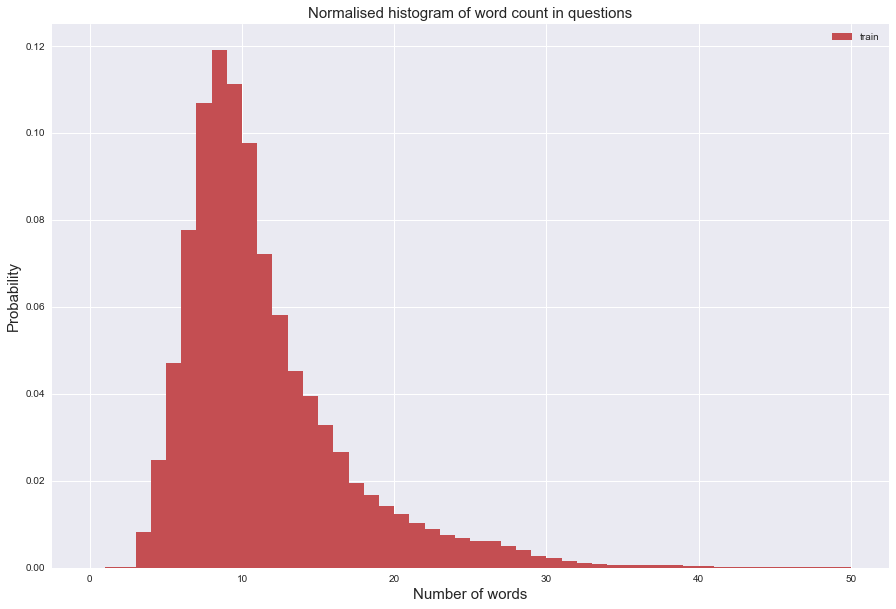

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

dist_train = train_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} max-train {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_train.max()))

In [19]:
train_qs.head(200)

0      What is the step by step guide to invest in sh...
1      What is the story of Kohinoor (Koh-i-Noor) Dia...
2      How can I increase the speed of my internet co...
3      Why am I mentally very lonely? How can I solve...
4      Which one dissolve in water quikly sugar, salt...
5      Astrology: I am a Capricorn Sun Cap moon and c...
6                                    Should I buy tiago?
7                         How can I be a good geologist?
8                        When do you use シ instead of し?
9      Motorola (company): Can I hack my Charter Moto...
10     Method to find separation of slits using fresn...
11           How do I read and find my YouTube comments?
12                  What can make Physics easy to learn?
13           What was your first sexual experience like?
14     What are the laws to change your status from a...
15     What would a Trump presidency mean for current...
16                          What does manipulation mean?
17     Why do girls want to be 

In [13]:
import os
import re
import csv
import codecs

from nltk.corpus import stopwords

def text_to_wordlist(text, remove_stopwords=False, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    # convert to str
    text = str(text)
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    
    ##
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"\0s", "0", text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)



In [36]:
texts_1 = [text_to_wordlist(q) for q in df_train['question1']]
texts_2 = [text_to_wordlist(q) for q in df_train['question2']]
texts_combined = [texts_1[i] + " " + texts_2[i] for i in range(0,len(texts_1))]

labels_ = df_train['is_duplicate']

In [37]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# integer encode documents
#‘binary‘: Whether or not each word is present in the document. This is the default.
#‘count‘: The count of each word in the document.
#‘tfidf‘: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
#‘freq‘: The frequency of each word as a ratio of words within each document.
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
{'well': 1, 'done': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1}
[[ 0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [90]:
from keras.preprocessing.text import Tokenizer


# tokenizer use all of the data
max_features = 10000 #vocabulary size
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts_combined)

sequences_ = tokenizer.texts_to_sequences(texts_combined)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 85518 unique tokens


In [91]:
# split the data into train and test
import random
indexes = random.sample(range(0, len(sequences_)), int(len(sequences_)*0.7))
tindexes = set([i for i in range(0, len(sequences_))]) - set(indexes)

In [92]:
X_train = [sequences_[i] for i in indexes]
X_test = [sequences_[i] for i in tindexes]

y_train = np.array([labels_[i] for i in indexes])
y_test = np.array([labels_[i] for i in tindexes])

In [93]:
#sequences_1
#texts_1

In [94]:
X_train

[[3,
  54,
  1,
  4435,
  1866,
  10,
  3053,
  6,
  519,
  2,
  21,
  17,
  110,
  41,
  7,
  22,
  6,
  4435,
  1866],
 [9,
  134,
  667,
  1334,
  80,
  13,
  6,
  134,
  667,
  299,
  171,
  340,
  5,
  13,
  15,
  55,
  17,
  80],
 [2,
  3,
  1,
  932,
  10,
  1,
  9024,
  8,
  1,
  9523,
  1727,
  1155,
  4,
  164,
  224,
  1,
  9024,
  8,
  1,
  9523,
  12,
  4,
  60,
  51,
  4,
  164,
  32,
  829,
  769,
  7,
  5465,
  17],
 [2,
  3,
  19,
  201,
  7,
  124,
  6,
  714,
  1056,
  2047,
  14,
  137,
  40,
  3,
  4033,
  57,
  13,
  4,
  87,
  81,
  981,
  2615,
  93],
 [2, 3, 1, 434, 10, 810, 2, 3, 35, 434, 10],
 [2,
  11,
  175,
  778,
  2077,
  14,
  144,
  454,
  1131,
  2,
  3,
  175,
  778,
  543,
  14,
  1,
  7197,
  320,
  65,
  1,
  1030],
 [5,
  75,
  11,
  1,
  1142,
  6942,
  375,
  249,
  249,
  249,
  249,
  249,
  249,
  249,
  249,
  249,
  5,
  75,
  3,
  1,
  1538,
  249,
  375],
 [2, 9, 15, 387, 111, 47, 608, 2, 9, 15, 111, 1, 52, 47, 608],
 [5,
  1362,
  3,
  

In [16]:
# [[1,14,22,..],[....],[....]]  -> 补全长度,不够的补0,太多的砍掉
from keras.preprocessing import sequence
max_review_length = 50
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length) #padding
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

Using TensorFlow backend.


KeyboardInterrupt: 

In [96]:
len(X_train[0]), len(X_train[1]), len(X_train[2])

(1600, 1600, 1600)

In [97]:
import warnings
warnings.filterwarnings('ignore')
import numpy
from numpy import array
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv1D, Convolution1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [98]:
model = Sequential()

In [99]:
# word indexes -> word vectors
# [[1],[1,2,3] -> [[0.9, 0.1, 0.1], [0.9, 0.9, 0.9]]
# add Embedding Layer

embedding_vecor_length = 300
model.add(Embedding(max_features, embedding_vecor_length, input_length=max_review_length)) 
# input: an integer matrix of size (batch, input_length), i.e.,(None, 1600) 
# input (30, 3, 4) inputsize =(3,4)
# output: (None, max_review_length, embedding_vecor_length), i.e.,(None, 1600, 300) where None is the batch dimension(变长) 

In [100]:
# add Conv layer
# Input:（samples，max_review_length，embedding_vecor_length）的3D张量
# Output:（samples，new_steps，nb_filter）的3D张量，
nb_filter = 250
filter_length = 3
# 'valid': no padding, 'same': output=input, 有padding
model.add(Conv1D(filters=nb_filter, kernel_size=filter_length, padding='valid', activation='relu'))
# now model.output_shape == (None, nb_filter), i.e., (None, 1598, 250)
# (input + 2padding -filter) / stride + 1 




In [101]:
# add MaxPooling Layer
model.add(MaxPooling1D(pool_length=model.output_shape[1]))
# output: (None, 1, 250)

In [102]:
# get many small vectors
model.add(Flatten())
# output: (None, 250)

In [103]:
# Classifier: 2 Layer Neural Network (MLP)
hidden_dims = 200
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1)) #y=0/1
model.add(Activation('sigmoid')) # model.add(Dense(1, activation='sigmoid'))

In [104]:
# choose loss function and optimizing method
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1600, 300)         3000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1598, 250)         225250    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 250)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               50200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
__________

In [106]:
# train the model
batch_size = 32
nb_epoch = 2
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch)

Epoch 1/2
283003/283003 [==============================] - 9007s - loss: 0.4857 - acc: 0.7622  
Epoch 2/2
283003/283003 [==============================] - 8624s - loss: 0.3795 - acc: 0.8254  


In [107]:
# Evaluation on the test set
scores = model.evaluate(X_test, y_test) #, verbose=0
print ("Accuracy: %.2f%%" % (scores[1]*100)) # loss, accuracy

121287/121287 [==============================] - 1237s  
Accuracy: 80.32%
